In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

1)Load the data

In [3]:
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [4]:
df.info() # almost all the columns are of object type exxcept one column is int
# also all column count for not-null values is not same..so check for nulll values with isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


In [6]:
df.isnull().sum()# can see that there are 4 columns containing null/nan values

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

The columns director and cast is not soo important for this dataset, and also they have many null values, hence droping them

In [7]:
df.drop(['director'], inplace = True, axis =1)
df.drop(['cast'], inplace=True, axis = 1)

In [8]:
df.isnull().sum()

show_id           0
type              0
title             0
country         831
date_added       10
release_year      0
rating            4
duration          3
listed_in         0
description       0
dtype: int64

now country and date_added columns also has null values but they can be ignored as not to change original dataset order

2)Explore data

In [12]:
df['type'].unique()

array(['Movie', 'TV Show'], dtype=object)

In [15]:
df['type'].value_counts()

type
Movie      6131
TV Show    2676
Name: count, dtype: int64

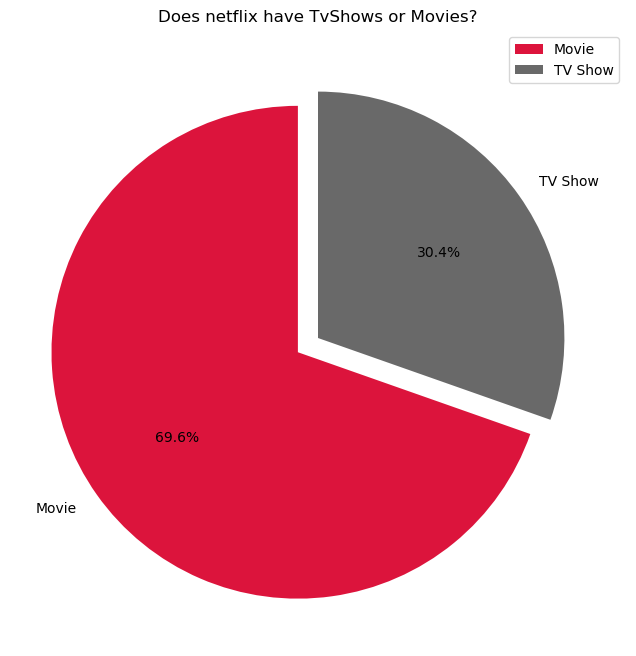

In [20]:
percent = df['type'].value_counts()
plt.figure(figsize=(8,8))
plt.pie(percent.values, labels = percent.index, autopct = '%.1f%%', startangle = 90, explode = [0.1,0], colors = ['crimson', 'dimgrey'])
plt.legend()
plt.title("Does netflix have TvShows or Movies?")
plt.show()

In [21]:
type_and_date = df[['type', 'date_added']].copy()
type_and_date['date_added'] = pd.to_datetime(type_and_date['date_added'], format = 'mixed')
type_and_date['year_added'] = pd.DatetimeIndex(type_and_date['date_added']).year
type_and_date

,type,date_added,year_added
0,Movie,2021-09-25,2021.0
1,TV Show,2021-09-24,2021.0
2,TV Show,2021-09-24,2021.0
3,TV Show,2021-09-24,2021.0
4,TV Show,2021-09-24,2021.0
...,...,...,...
8802,Movie,2019-11-20,2019.0
8803,TV Show,2019-07-01,2019.0
8804,Movie,2019-11-01,2019.0
8805,Movie,2020-01-11,2020.0


In [24]:
type_and_date.isnull().sum()# as there are 10 null values and we are focusing mainly on to find weather tv shows or movies uploaded more by year
# hence droping them

type           0
date_added    10
year_added    10
dtype: int64

In [25]:
type_and_date.dropna(inplace=True)
type_and_date['year_added'].unique()

array([2021., 2020., 2019., 2018., 2017., 2016., 2015., 2014., 2013.,
       2012., 2011., 2009., 2008., 2010.])

In [26]:
count = type_and_date.groupby(['year_added', 'type']).count().rename(columns={'date_added':'count'})
count.reset_index(inplace=True)
count

,year_added,type,count
0,2008.0,Movie,1
1,2008.0,TV Show,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
7,2013.0,TV Show,5
8,2014.0,Movie,19
9,2014.0,TV Show,5


In [27]:
count_tvshow = count[count['type']=='TV Show']
count_movies = count[count['type']=='Movie']

In [28]:
count_tvshow

,year_added,type,count
1,2008.0,TV Show,1
7,2013.0,TV Show,5
9,2014.0,TV Show,5
11,2015.0,TV Show,26
13,2016.0,TV Show,176
15,2017.0,TV Show,349
17,2018.0,TV Show,412
19,2019.0,TV Show,592
21,2020.0,TV Show,595
23,2021.0,TV Show,505


In [29]:
count_movies

,year_added,type,count
0,2008.0,Movie,1
2,2009.0,Movie,2
3,2010.0,Movie,1
4,2011.0,Movie,13
5,2012.0,Movie,3
6,2013.0,Movie,6
8,2014.0,Movie,19
10,2015.0,Movie,56
12,2016.0,Movie,253
14,2017.0,Movie,839


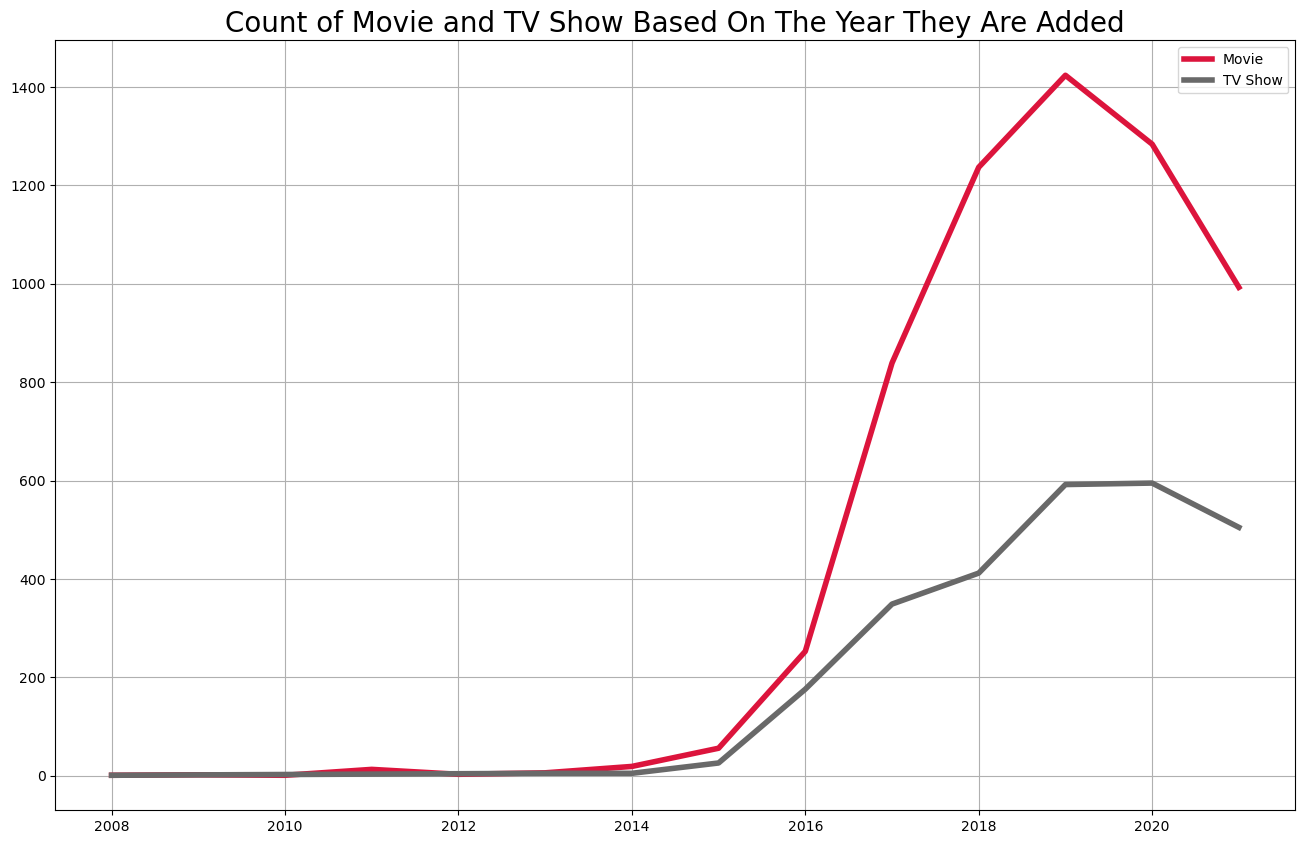

In [30]:
plt.figure(figsize=(16,10))
plt.plot(count_movies['year_added'], count_movies['count'], lw=4, c='crimson', label='Movie')
plt.plot(count_tvshow['year_added'], count_tvshow['count'], lw=4, c='dimgrey', label='TV Show')
plt.legend()
plt.grid()
plt.title('Count of Movie and TV Show Based On The Year They Are Added', fontsize=20)
plt.show()

In [31]:
cumulative_count_tvshow = count_tvshow.groupby('type').cumsum()
cumulative_count_tvshow

,year_added,count
1,2008.0,1
7,4021.0,6
9,6035.0,11
11,8050.0,37
13,10066.0,213
15,12083.0,562
17,14101.0,974
19,16120.0,1566
21,18140.0,2161
23,20161.0,2666


In [32]:
cumulative_count_movies = count_movies.groupby('type').cumsum()
cumulative_count_movies

,year_added,count
0,2008.0,1
2,4017.0,3
3,6027.0,4
4,8038.0,17
5,10050.0,20
6,12063.0,26
8,14077.0,45
10,16092.0,101
12,18108.0,354
14,20125.0,1193


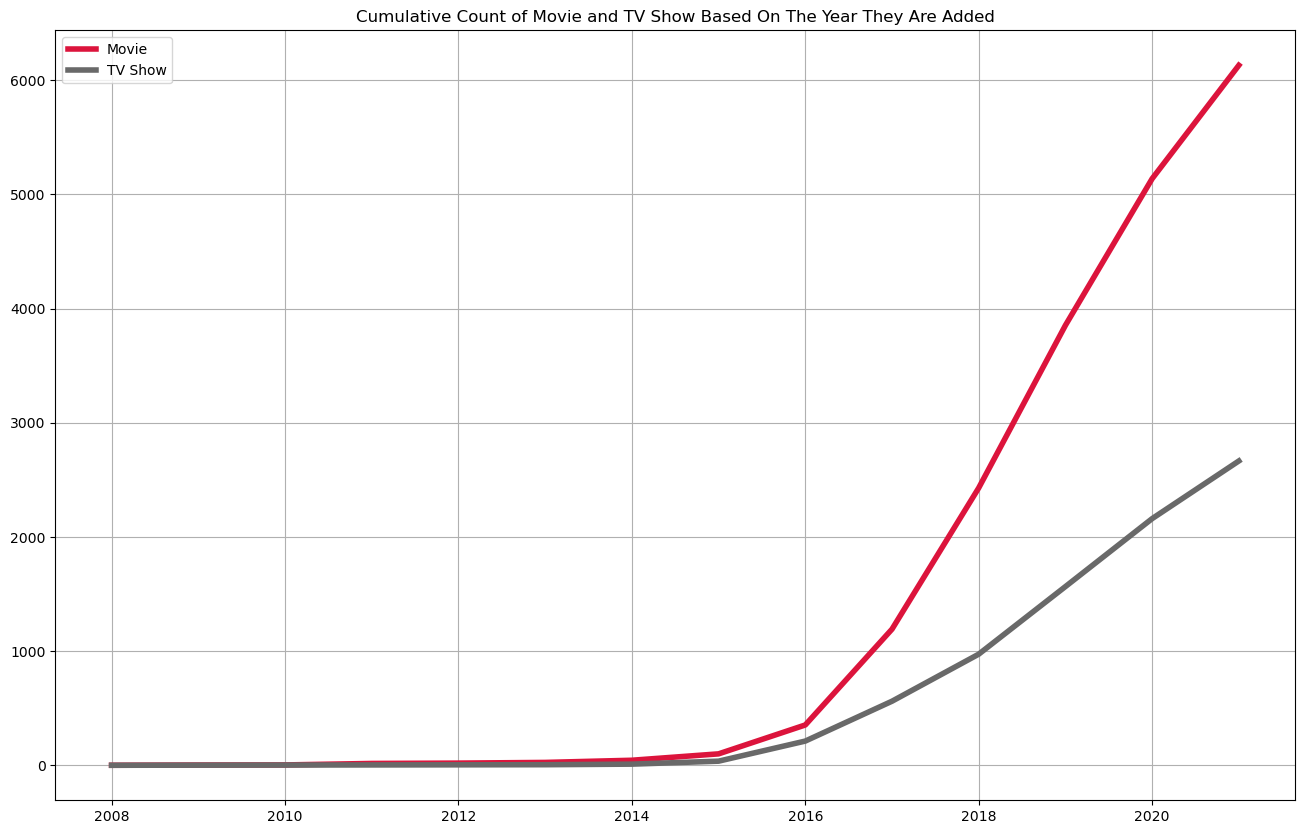

In [33]:
plt.figure(figsize=(16,10))
plt.plot(count_movies['year_added'], cumulative_count_movies['count'], lw=4, c='crimson', label='Movie')
plt.plot(count_tvshow['year_added'], cumulative_count_tvshow['count'], lw=4, c='dimgrey', label='TV Show')
plt.legend()
plt.grid()
plt.title('Cumulative Count of Movie and TV Show Based On The Year They Are Added')
plt.show()

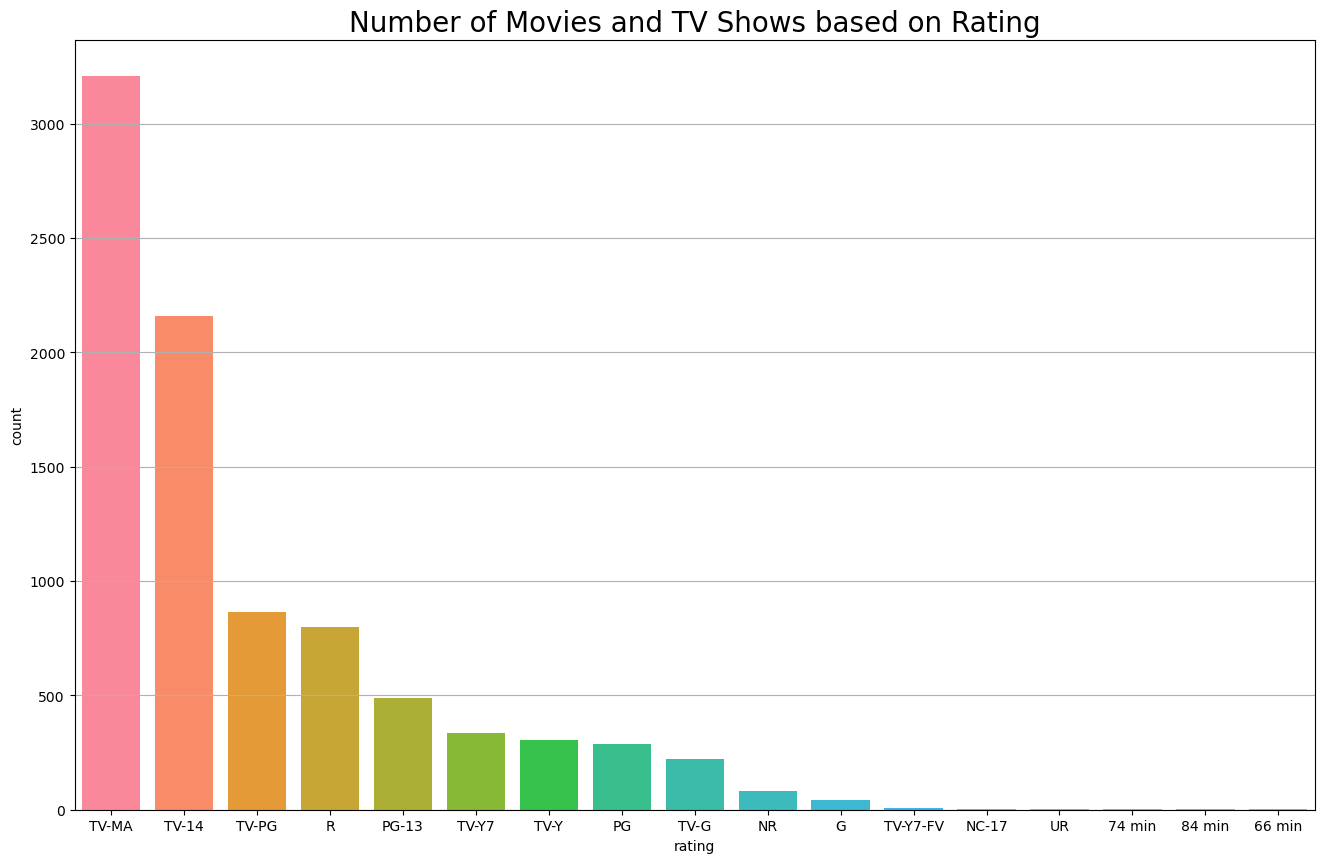

In [36]:
# rating_count
plt.figure(figsize=(16,10))
plt.title('Number of Movies and TV Shows based on Rating', fontsize=20)
plt.grid()
sns.countplot(x='rating', data=df, saturation=1, order=df['rating'].value_counts().index);

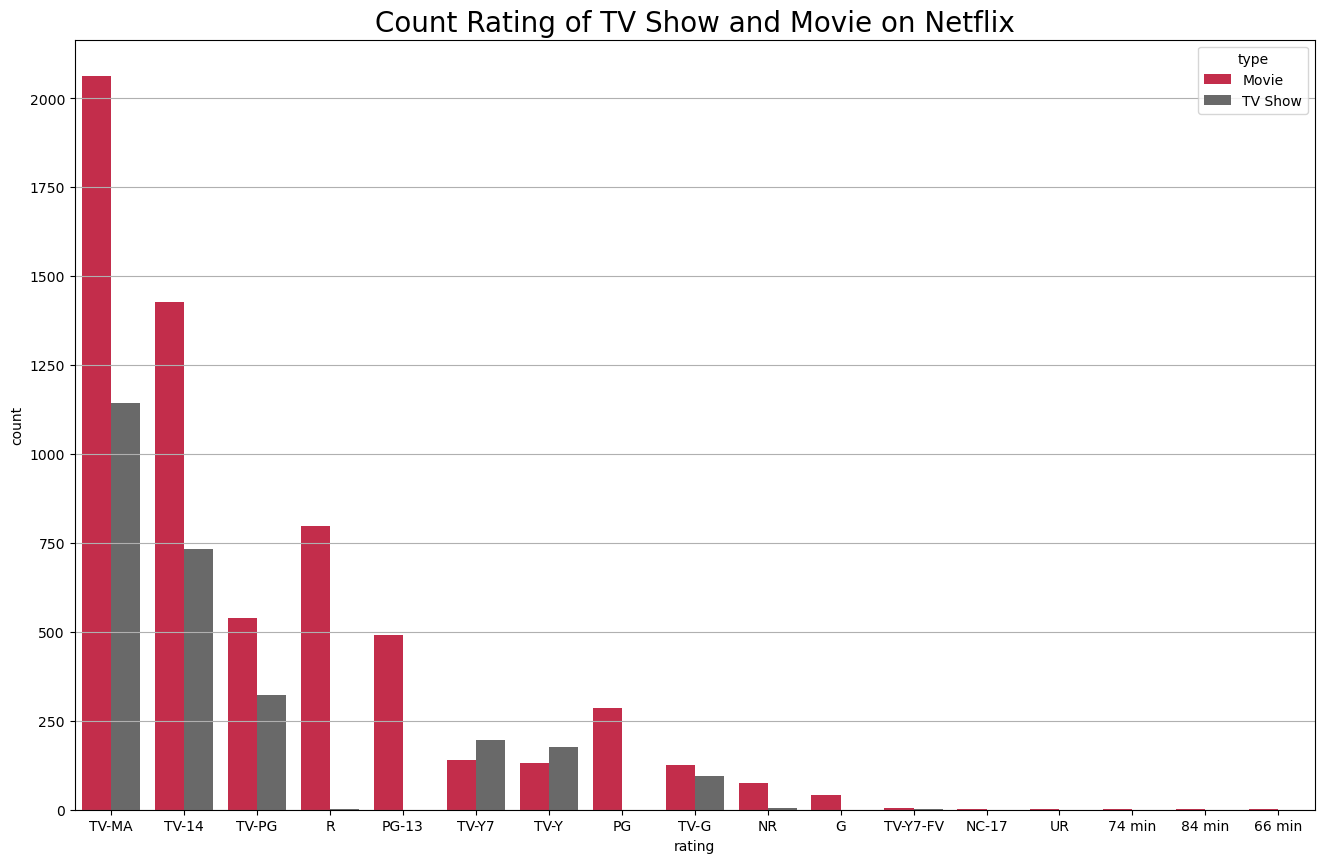

In [37]:
plt.figure(figsize=(16,10))
plt.title('Count Rating of TV Show and Movie on Netflix', fontsize=20)
plt.grid()
sns.countplot(x='rating', hue='type', data=df, order=df['rating'].value_counts().index, palette=['crimson', 'dimgrey']);

In [38]:
#Top 5 oldest movies available on netflix based on release year
df.sort_values('release_year', ascending=True)[['title','date_added','release_year']].head() 

,title,date_added,release_year
4250,Pioneers: First Women Filmmakers*,"December 30, 2018",1925
7790,Prelude to War,"March 31, 2017",1942
8205,The Battle of Midway,"March 31, 2017",1942
8660,Undercover: How to Operate Behind Enemy Lines,"March 31, 2017",1943
8739,Why We Fight: The Battle of Russia,"March 31, 2017",1943


In [39]:
# top 5 newest movies available on Netflix based pn release year
df.sort_values('release_year', ascending = False)[['title', 'date_added','release_year']].head()

,title,date_added,release_year
693,Ali & Ratu Ratu Queens,"June 17, 2021",2021
781,Black Holes | The Edge of All We Know,"June 2, 2021",2021
762,Sweet & Sour,"June 4, 2021",2021
763,Sweet Tooth,"June 4, 2021",2021
764,Trippin' with the Kandasamys,"June 4, 2021",2021


In [40]:
# top 5 oldest movies available on netflix based on year_added
df['year_added'] = pd.DatetimeIndex(df['date_added']).year

In [41]:
df.sort_values('year_added', ascending=True)[['title','date_added','release_year']].head()

,title,date_added,release_year
5957,To and From New York,"January 1, 2008",2006
6611,Dinner for Five,"February 4, 2008",2007
5956,Just Another Love Story,"May 5, 2009",2007
5955,Splatter,"November 18, 2009",2009
7370,Mad Ron's Prevues from Hell,"November 1, 2010",1987


QUESTIONS

Task.1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records.
Task. 2) Is there any Null Value present in any column ? Show with Heat-map.
Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?
Q. 2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
Q. 3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
Q. 4) Show all the Movies that were released in year 2000.
Q. 5) Show only the Titles of all TV Shows that were released in India only.
Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
Q. 8) In how many movies/shows, Tom Cruise was cast ?
Q. 9) What are the different Ratings defined by Netflix ?
Q. 9.1) How many Movies got the 'TV-14' rating, in Canada ?
Q. 9.2) How many TV Shows got the 'R' rating, after year 2018 ?
Q. 10) What is the maximum duration of a Movie/Show on Netflix ?
Q. 11) Which individual country has the Highest No. of TV Shows ?
Q. 12) How can we sort the dataset by Year ?
Q. 13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'.** Task. 1) Is there any Duplicate Record in this dataset ? If yes, then remove the duplicate records."Country is United Kingdom".

In [46]:
# will try to solve all the above questions....frist i will view the dataset
# using dataset from netflix since we droped some columns above due to null values
df = pd.read_csv('netflix_titles.csv')
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [47]:
df.shape

(8807, 12)

In [52]:
df.dtypes

show_id         object
type            object
title           object
director        object
cast            object
country         object
date_added      object
release_year     int64
rating          object
duration        object
listed_in       object
description     object
dtype: object

In [53]:
# to check duplicated records in dataset...no records are shown
df[df.duplicated()]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description


In [54]:
df.drop_duplicates(inplace = True)

In [55]:
df.shape

(8807, 12)

In [51]:
#checking for null values and seeen 4 coloumns have many null vuales
#Task. 2) Is there any Null Value present in any column ? Show with Heat-map.
df.isna().sum()

show_id            0
type               0
title              0
director        2634
cast             825
country          831
date_added        10
release_year       0
rating             4
duration           3
listed_in          0
description        0
dtype: int64

<Axes: >

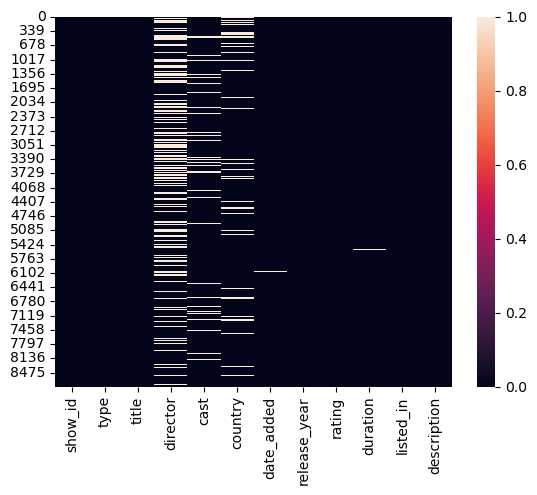

In [56]:
sns.heatmap(df.isnull())

In [59]:
#Q. 1) For 'House of Cards', what is the Show Id and Who is the Director of this show ?
df[df['title'].isin(['House of Cards'])]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
1059,s1060,TV Show,House of Cards,NaN,"Kevin Spacey, Robin Wright, Kate Mara, Corey S...",United States,"April 14, 2021",2018,TV-MA,6 Seasons,"TV Dramas, TV Thrillers",A ruthless politician will stop at nothing to ...


In [60]:
#2) In which year the highest number of the TV Shows & Movies were released ? Show with Bar Graph.
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8807 entries, 0 to 8806
Data columns (total 12 columns):
 #   Column        Non-Null Count  Dtype 
---  ------        --------------  ----- 
 0   show_id       8807 non-null   object
 1   type          8807 non-null   object
 2   title         8807 non-null   object
 3   director      6173 non-null   object
 4   cast          7982 non-null   object
 5   country       7976 non-null   object
 6   date_added    8797 non-null   object
 7   release_year  8807 non-null   int64 
 8   rating        8803 non-null   object
 9   duration      8804 non-null   object
 10  listed_in     8807 non-null   object
 11  description   8807 non-null   object
dtypes: int64(1), object(11)
memory usage: 825.8+ KB


<Axes: xlabel='release_year'>

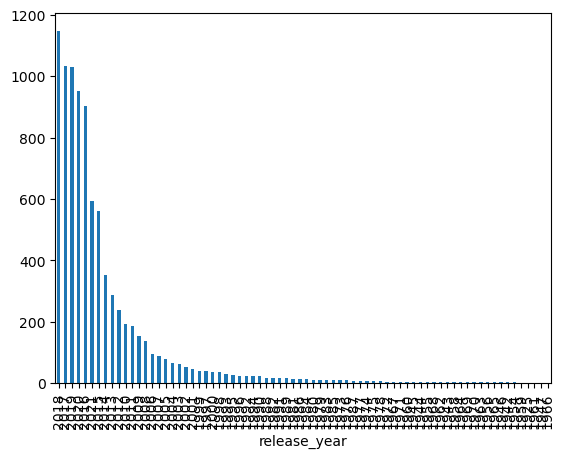

In [61]:
df.release_year.value_counts().plot(kind='bar')

<Axes: xlabel='release_year', ylabel='count'>

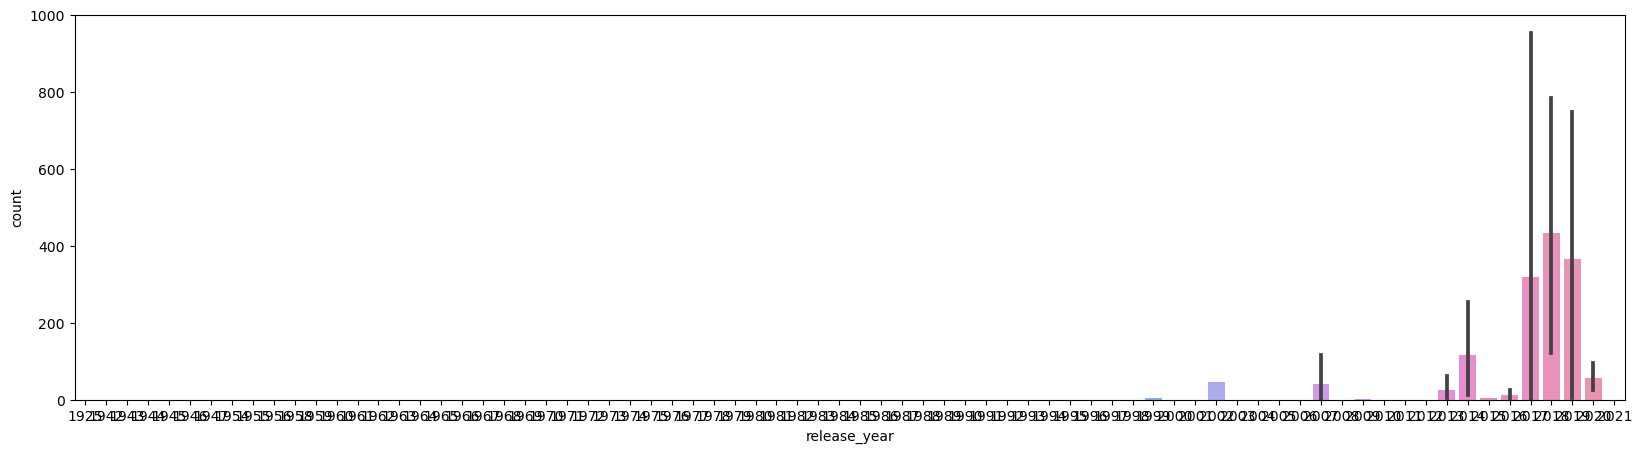

In [64]:

#sns.barplot(df.release_year df.release_year.value_counts())
plt.figure(figsize = (20, 5))
sns.barplot(x = df.release_year  ,y = df.release_year.value_counts() )

<Axes: xlabel='type'>

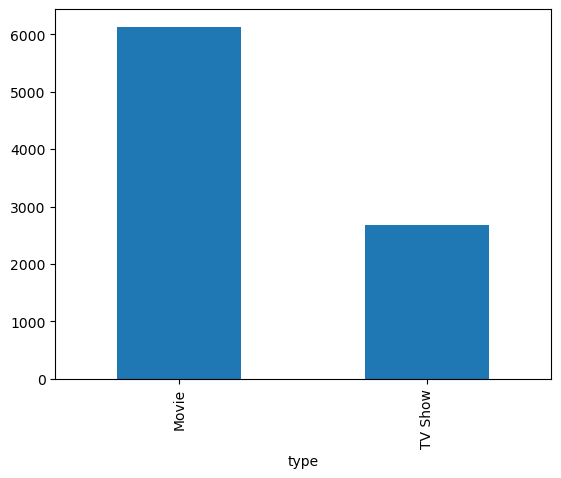

In [68]:
#3) How many Movies & TV Shows are in the dataset ? Show with Bar Graph.
df.type.value_counts().plot(kind = 'bar')

<Axes: xlabel='type', ylabel='count'>

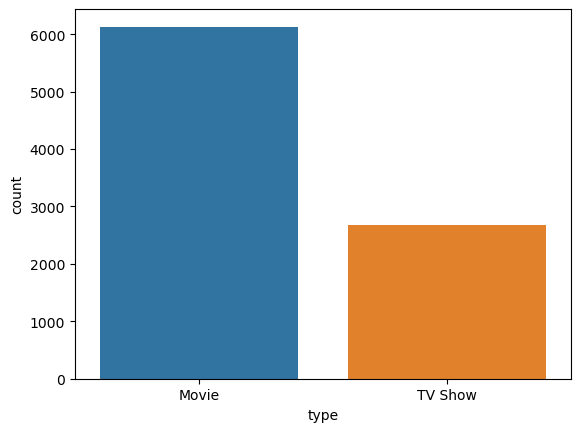

In [74]:
sns.countplot(data=df, x = 'type')

In [82]:
#Q. 4) Show all the Movies that were released in year 2000
df[(df['type']== 'Movie') & (df['release_year']==2000)]['title']

180                    The Nutty Professor II: The Klumps
350                                         Space Cowboys
359                          The Original Kings of Comedy
566                                      Charlie's Angels
593                                              Snow Day
779                                     Battlefield Earth
952                                  The Whole Nine Yards
3472                          Rugrats in Paris: The Movie
4545               Monty Python: Before the Flying Circus
4723                                                 Fiza
4956                          Phir Bhi Dil Hai Hindustani
5953                               Joseph: King of Dreams
6006                                              28 Days
6147                                      American Psycho
6154    An American Tail: The Treasures of Manhattan I...
6311                                         Billy Elliot
6437                                         Center Stage
6440          

In [84]:
#Q. 5) Show only the Titles of all TV Shows that were released in India only.
df[(df['type']=='TV Show')&(df['country']=='India')]['title']

4                             Kota Factory
39                            Chhota Bheem
50                           Dharmakshetra
66           Raja Rasoi Aur Anya Kahaniyan
69          Stories by Rabindranath Tagore
                       ...                
8173                             Thackeray
8235                           The Calling
8321    The Golden Years with Javed Akhtar
8349                The House That Made Me
8775                       Yeh Meri Family
Name: title, Length: 79, dtype: object

In [87]:
#Q. 6) Show Top 10 Directors, who gave the highest number of TV Shows & Movies to Netflix ?
df['director'].value_counts().head(10)

director
Rajiv Chilaka             19
Raúl Campos, Jan Suter    18
Marcus Raboy              16
Suhas Kadav               16
Jay Karas                 14
Cathy Garcia-Molina       13
Martin Scorsese           12
Youssef Chahine           12
Jay Chapman               12
Steven Spielberg          11
Name: count, dtype: int64

In [91]:
#Q. 7) Show all the Records, where "Category is Movie and Type is Comedies" or "Country is United Kingdom".
df[(df['type']=='Movie') & (df['listed_in']=='Comedies') | (df['country']=='United States')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
9,s10,Movie,The Starling,Theodore Melfi,"Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...",United States,"September 24, 2021",2021,PG-13,104 min,"Comedies, Dramas",A woman adjusting to life after a loss contend...
15,s16,TV Show,Dear White People,NaN,"Logan Browning, Brandon P. Bell, DeRon Horton,...",United States,"September 22, 2021",2021,TV-MA,4 Seasons,"TV Comedies, TV Dramas",Students of color navigate the daily slights a...
27,s28,Movie,Grown Ups,Dennis Dugan,"Adam Sandler, Kevin James, Chris Rock, David S...",United States,"September 20, 2021",2010,PG-13,103 min,Comedies,Mourning the loss of their beloved junior high...
28,s29,Movie,Dark Skies,Scott Stewart,"Keri Russell, Josh Hamilton, J.K. Simmons, Dak...",United States,"September 19, 2021",2013,PG-13,97 min,"Horror Movies, Sci-Fi & Fantasy",A family’s idyllic suburban life shatters when...
...,...,...,...,...,...,...,...,...,...,...,...,...
8791,s8792,Movie,Young Adult,Jason Reitman,"Charlize Theron, Patton Oswalt, Patrick Wilson...",United States,"November 20, 2019",2011,R,94 min,"Comedies, Dramas, Independent Movies",When a divorced writer gets a letter from an o...
8793,s8794,Movie,"Yours, Mine and Ours",Raja Gosnell,"Dennis Quaid, Rene Russo, Sean Faris, Katija P...",United States,"November 20, 2019",2005,PG,88 min,"Children & Family Movies, Comedies",When a father of eight and a mother of 10 prep...
8802,s8803,Movie,Zodiac,David Fincher,"Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...",United States,"November 20, 2019",2007,R,158 min,"Cult Movies, Dramas, Thrillers","A political cartoonist, a crime reporter and a..."
8804,s8805,Movie,Zombieland,Ruben Fleischer,"Jesse Eisenberg, Woody Harrelson, Emma Stone, ...",United States,"November 1, 2019",2009,R,88 min,"Comedies, Horror Movies",Looking to survive in a world taken over by zo...


In [93]:
df.cast

0                                                     NaN
1       Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...
2       Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...
3                                                     NaN
4       Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...
                              ...                        
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8803                                                  NaN
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 8807, dtype: object

In [94]:
#Q. 8) In how many movies/shows, Tom Cruise was cast ?
#str .contains does not work on empty nan values we need to remove nan values 

df_new = df.dropna()

In [95]:
df_new.cast

7       Kofi Ghanaba, Oyafunmike Ogunlano, Alexandra D...
8       Mel Giedroyc, Sue Perkins, Mary Berry, Paul Ho...
9       Melissa McCarthy, Chris O'Dowd, Kevin Kline, T...
12      Luna Wedler, Jannis Niewöhner, Milan Peschel, ...
24      Prashanth, Aishwarya Rai Bachchan, Sri Lakshmi...
                              ...                        
8801    Ali Suliman, Saleh Bakri, Yasa, Ali Al-Jabri, ...
8802    Mark Ruffalo, Jake Gyllenhaal, Robert Downey J...
8804    Jesse Eisenberg, Woody Harrelson, Emma Stone, ...
8805    Tim Allen, Courteney Cox, Chevy Chase, Kate Ma...
8806    Vicky Kaushal, Sarah-Jane Dias, Raaghav Chanan...
Name: cast, Length: 5332, dtype: object

In [96]:
df_new[df_new.cast.str.contains('Tom Cruise')]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
341,s342,Movie,Magnolia,Paul Thomas Anderson,"John C. Reilly, Philip Baker Hall, Tom Cruise,...",United States,"August 1, 2021",1999,R,189 min,"Dramas, Independent Movies","Through chance, history and divine interventio..."
1254,s1255,Movie,Rain Man,Barry Levinson,"Dustin Hoffman, Tom Cruise, Valeria Golino, Ge...",United States,"March 1, 2021",1988,R,134 min,"Classic Movies, Dramas","Motivated by money, a selfish workaholic seeki..."


In [99]:
df_new[df_new.cast.str.contains('Tom Cruise')]['title'].value_counts().sum()

2

In [102]:
#Q. 9) What are the different Ratings defined by Netflix ?
df.rating.nunique()

17

In [103]:
df.rating.values

array(['PG-13', 'TV-MA', 'TV-MA', ..., 'R', 'PG', 'TV-14'], dtype=object)

In [104]:
df.rating.unique()

array(['PG-13', 'TV-MA', 'PG', 'TV-14', 'TV-PG', 'TV-Y', 'TV-Y7', 'R',
       'TV-G', 'G', 'NC-17', '74 min', '84 min', '66 min', 'NR', nan,
       'TV-Y7-FV', 'UR'], dtype=object)

In [113]:
#.1) How many Movies got the 'TV-14' rating, in Canada ?
df[(df.type == 'Movie') & (df.rating == 'TV-14') & (df.country == 'Canada')].shape[0]

13

In [116]:
#9.2) How many TV Shows got the 'TV-MA' rating, after year 2018 ?
df[(df.type == 'TV Show')& (df.rating == 'TV-MA')&(df.release_year > 2018)].shape[0]

623

In [117]:
#10) What is the maximum duration of a Movie/Show on Netflix ?
df.duration.unique()

array(['90 min', '2 Seasons', '1 Season', '91 min', '125 min',
       '9 Seasons', '104 min', '127 min', '4 Seasons', '67 min', '94 min',
       '5 Seasons', '161 min', '61 min', '166 min', '147 min', '103 min',
       '97 min', '106 min', '111 min', '3 Seasons', '110 min', '105 min',
       '96 min', '124 min', '116 min', '98 min', '23 min', '115 min',
       '122 min', '99 min', '88 min', '100 min', '6 Seasons', '102 min',
       '93 min', '95 min', '85 min', '83 min', '113 min', '13 min',
       '182 min', '48 min', '145 min', '87 min', '92 min', '80 min',
       '117 min', '128 min', '119 min', '143 min', '114 min', '118 min',
       '108 min', '63 min', '121 min', '142 min', '154 min', '120 min',
       '82 min', '109 min', '101 min', '86 min', '229 min', '76 min',
       '89 min', '156 min', '112 min', '107 min', '129 min', '135 min',
       '136 min', '165 min', '150 min', '133 min', '70 min', '84 min',
       '140 min', '78 min', '7 Seasons', '64 min', '59 min', '139 min',
    

In [118]:
df.duration.nunique()

220

In [119]:
df.duration.dtype

dtype('O')

In [120]:
df[['minutes','unit']] = df.duration.str.split(' ', expand = True)
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2,Seasons


In [123]:
df['minutes'] = pd.to_numeric(df['minutes'])
df.head()

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
0,s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,"September 25, 2021",2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm...",90.0,min
1,s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t...",2.0,Seasons
2,s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,"September 24, 2021",2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...,1.0,Season
3,s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,"September 24, 2021",2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo...",1.0,Season
4,s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,"September 24, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...,2.0,Seasons


In [124]:
df['minutes'].max()

312.0

In [126]:
#11) Which individual country has the Highest No. of TV Shows ?
df[df.type=='TV Show']['country'].value_counts().head(1)

country
United States    760
Name: count, dtype: int64

In [127]:
#Q. 12) How can we sort the dataset by Year ?
df.sort_values(by='release_year')

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
4250,s4251,TV Show,Pioneers: First Women Filmmakers*,NaN,NaN,NaN,"December 30, 2018",1925,TV-14,1 Season,TV Shows,This collection restores films from women who ...,1.0,Season
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52.0,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18.0,min
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,61.0,min
8739,s8740,Movie,Why We Fight: The Battle of Russia,"Frank Capra, Anatole Litvak",NaN,United States,"March 31, 2017",1943,TV-PG,82 min,Documentaries,This installment of Frank Capra's acclaimed do...,82.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
862,s863,TV Show,Special,NaN,"Ryan O'Connell, Jessica Hecht, Punam Patel, Ma...",United States,"May 20, 2021",2021,TV-MA,2 Seasons,TV Comedies,A young gay man with cerebral palsy branches o...,2.0,Seasons
861,s862,Movie,Little Singham Future mein Satakli,Prakash Satam,"Anamaya Verma, Ganesh Divekar, Jigna Bharadhwa...",NaN,"May 20, 2021",2021,TV-Y7,47 min,"Children & Family Movies, Comedies",Little Singham and his crew travel to the year...,47.0,min
857,s858,TV Show,The Neighbor,NaN,"Quim Gutiérrez, Clara Lago, Adrián Pino, Catel...",Spain,"May 21, 2021",2021,TV-MA,2 Seasons,"International TV Shows, Spanish-Language TV Sh...",Self-centered Javier's life gets a bit messy w...,2.0,Seasons
876,s877,TV Show,Alma Matters,NaN,NaN,India,"May 14, 2021",2021,TV-MA,1 Season,"Docuseries, International TV Shows",Alumni of India’s elite academic institutes sh...,1.0,Season


In [128]:
df.sort_values(by = 'release_year',ascending=False)

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
693,s694,Movie,Ali & Ratu Ratu Queens,Lucky Kuswandi,"Iqbaal Ramadhan, Nirina Zubir, Asri Welas, Tik...",NaN,"June 17, 2021",2021,TV-14,101 min,"Comedies, Dramas, International Movies","After his father's passing, a teenager sets ou...",101.0,min
781,s782,Movie,Black Holes | The Edge of All We Know,Peter Galison,NaN,NaN,"June 2, 2021",2021,TV-14,99 min,Documentaries,Follow scientists on their quest to understand...,99.0,min
762,s763,Movie,Sweet & Sour,Lee Kae-byeok,"Jang Ki-yong, Chae Soo-bin, Jung Soo-jung",South Korea,"June 4, 2021",2021,TV-14,103 min,"Comedies, International Movies, Romantic Movies",Faced with real-world opportunities and challe...,103.0,min
763,s764,TV Show,Sweet Tooth,NaN,"Nonso Anozie, Christian Convery, Adeel Akhtar,...",United States,"June 4, 2021",2021,TV-14,1 Season,"TV Action & Adventure, TV Dramas, TV Sci-Fi & ...",On a perilous adventure across a post-apocalyp...,1.0,Season
764,s765,Movie,Trippin' with the Kandasamys,Jayan Moodley,"Jailoshini Naidoo, Maeshni Naicker, Madhushan ...",South Africa,"June 4, 2021",2021,TV-14,94 min,"Comedies, International Movies, Romantic Movies","To rekindle their marriages, best friends-turn...",94.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8660,s8661,Movie,Undercover: How to Operate Behind Enemy Lines,John Ford,NaN,United States,"March 31, 2017",1943,TV-PG,61 min,"Classic Movies, Documentaries",This World War II-era training film dramatizes...,61.0,min
8763,s8764,Movie,WWII: Report from the Aleutians,John Huston,NaN,United States,"March 31, 2017",1943,TV-PG,45 min,Documentaries,Filmmaker John Huston narrates this Oscar-nomi...,45.0,min
8205,s8206,Movie,The Battle of Midway,John Ford,"Henry Fonda, Jane Darwell",United States,"March 31, 2017",1942,TV-14,18 min,"Classic Movies, Documentaries",Director John Ford captures combat footage of ...,18.0,min
7790,s7791,Movie,Prelude to War,Frank Capra,NaN,United States,"March 31, 2017",1942,TV-14,52 min,"Classic Movies, Documentaries",Frank Capra's documentary chronicles the rise ...,52.0,min


In [130]:
#13) Find all the instances where: Category is 'Movie' and Type is 'Dramas' or Category is 'TV Show' & Type is 'Kids' TV'
df[((df.type == 'Movie')&(df.listed_in=='Dramas')) | ((df.type == 'TV Show') & (df.listed_in == 'Kids'))]

,show_id,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description,minutes,unit
112,s113,Movie,Worth,Sara Colangelo,"Michael Keaton, Stanley Tucci, Amy Ryan, Shuno...",NaN,"September 3, 2021",2021,PG-13,119 min,Dramas,"In the wake of the Sept. 11 attacks, a lawyer ...",119.0,min
129,s130,Movie,An Unfinished Life,Lasse Hallström,"Robert Redford, Jennifer Lopez, Morgan Freeman...","Germany, United States","September 1, 2021",2005,PG-13,108 min,Dramas,A grieving widow and her daughter move in with...,108.0,min
142,s143,Movie,Freedom Writers,Richard LaGravenese,"Hilary Swank, Patrick Dempsey, Scott Glenn, Im...","Germany, United States","September 1, 2021",2007,PG-13,124 min,Dramas,While her at-risk students are reading classic...,124.0,min
162,s163,Movie,Marshall,Reginald Hudlin,"Chadwick Boseman, Josh Gad, Kate Hudson, Sterl...","United States, China, Hong Kong","September 1, 2021",2017,PG-13,118 min,Dramas,"This biopic of Thurgood Marshall, the first Bl...",118.0,min
329,s330,Movie,Catch Me If You Can,Steven Spielberg,"Leonardo DiCaprio, Tom Hanks, Christopher Walk...","United States, Canada","August 1, 2021",2002,PG-13,142 min,Dramas,An FBI agent makes it his mission to put cunni...,142.0,min
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8674,s8675,Movie,Viceroy's House,Gurinder Chadha,"Hugh Bonneville, Gillian Anderson, Manish Daya...","United Kingdom, India, Sweden","December 12, 2017",2017,NR,106 min,Dramas,As viceroy Lord Mountbatten arrives in Delhi t...,106.0,min
8675,s8676,Movie,Victor,Brandon Dickerson,"Patrick Davis, Lisa Vidal, Josh Pence, José Zú...",United States,"July 24, 2017",2015,PG-13,110 min,Dramas,"In 1962 Brooklyn, a Puerto Rican teen who join...",110.0,min
8685,s8686,Movie,VS.,Ed Lilly,"Connor Swindells, Fola Evans-Akingbola, Nichol...",United Kingdom,"June 19, 2019",2018,TV-MA,99 min,Dramas,A young man in foster care finds his voice in ...,99.0,min
8691,s8692,Movie,Wakefield,Robin Swicord,"Bryan Cranston, Jennifer Garner, Jason O'Mara,...",United States,"March 2, 2019",2016,R,109 min,Dramas,An unhappy father and lawyer quits his suburba...,109.0,min
